In [1]:
####################################
# Special code for Jupyter Notebook
####################################
# Show plots in the notebook

#%matplotlib inline 
%matplotlib notebook 



# Automatically reload any packages that changed
#%load_ext autoreload
#%autoreload 2

# Display multiple arguments
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

####################
# Import libraries
####################
# Third party libraries

import os
import sys
import glob
import pandas as pd
import numpy as np
import pprint
import statistics as stat
import scipy as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import rainflow
import OrcFxAPI


# Python libraries
module_path = r"C:\Users\snod\OneDrive\CloudStation\DTU\Master in Wind Energy\06 - Master Thesis\19 - python modules"
sys.path.append(module_path)

import stephan_py as st
import pywasp_edu as pw


############################################
# Limit number of rows to print from Pandas
############################################
pd.options.display.max_rows = 40

pi = np.arccos(-1)

#plt.rcParams['figure.figsize'] = [300, 200]

# Used in order to embed figures in the text
from IPython.display import Image  

# Plots of DELs from Orcaflex simulations



In [2]:
# Read GWA details
print(os.getcwd())
os.chdir(r'D:\100 - Project files\02 - Orcaflex Runs')
print(os.getcwd())
gwa_df = pd.read_csv(r'weibull_prob.csv',index_col=0)

gwa_df


D:\100 - Project files\02 - Orcaflex Runs
D:\100 - Project files\02 - Orcaflex Runs


,DIR,Freq. [%],A,k,Umean,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0,22.0,24.0
0,0.0,8.75,10.180000,2.119000,9.02,0.126474,0.164965,0.173312,0.155135,0.121194,0.083639,0.051335,0.028132,0.013798,0.006065,0.002391
1,30.0,3.28,6.560000,1.799000,5.83,0.241461,0.216420,0.154056,0.091641,0.046696,0.020681,0.008038,0.002761,0.000842,0.000229,0.000056
2,60.0,2.43,6.050000,1.885000,5.37,0.268520,0.229416,0.147354,0.075057,0.031102,0.010640,0.003034,0.000726,0.000147,0.000025,0.000004
3,90.0,3.66,7.300000,1.662000,6.52,0.209285,0.193240,0.150870,0.104129,0.064936,0.037065,0.019532,0.009561,0.004368,0.001869,0.000752
4,120.0,7.69,13.420000,1.998000,11.89,0.080962,0.108625,0.123974,0.126933,0.119385,0.104459,0.085673,0.066185,0.048321,0.033421,0.021936
5,150.0,14.89,15.380000,2.217000,13.62,0.053149,0.080743,0.102533,0.115758,0.119334,0.113875,0.101367,0.084559,0.066293,0.048932,0.034043
6,180.0,12.15,12.720000,2.346000,11.27,0.072645,0.112490,0.140312,0.150308,0.141968,0.119689,0.090608,0.061763,0.037947,0.021013,0.010481
7,210.0,9.20,11.090000,1.990000,9.83,0.113810,0.144578,0.153289,0.143019,0.120229,0.092225,0.065044,0.042385,0.025605,0.014374,0.007513
8,240.0,7.78,11.460000,1.865000,10.18,0.112933,0.137086,0.142376,0.132805,0.113749,0.090560,0.067524,0.047393,0.031426,0.019740,0.011771
9,270.0,8.80,11.390000,1.916000,10.10,0.111910,0.138710,0.145751,0.136543,0.116679,0.092085,0.067633,0.046463,0.029963,0.018186,0.010409


In [3]:
# Set folders to use in plots
'''
folders = [r"D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,
           r"D:\100 - Project files\02 - Orcaflex Runs\111 - NTM Batch UMain contr WE_mode2 - 7 Alt4 contr",
           r"D:\100 - Project files\02 - Orcaflex Runs\112 - NTM Batch UMain contr WE_mode2 - 8 peak 90"
          ]
'''

folders = [r"D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,
           r"D:\100 - Project files\02 - Orcaflex Runs\203 - NTM Batch UMain contr WE_mode2 - IPC - 3"
          ]


plot_folder_switch = np.zeros((len(folders),), dtype=int) 

# Make dictionary for setting plot switch up
plot_folder_yes_no = dict(zip(folders, plot_folder_switch))

pprint.pprint(plot_folder_yes_no)


'\nfolders = [r"D:@ - Project files\x02 - Orcaflex RunsK - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,\n           r"D:@ - Project files\x02 - Orcaflex RunsI - NTM Batch UMain contr WE_mode2 - 7 Alt4 contr",\n           r"D:@ - Project files\x02 - Orcaflex RunsJ - NTM Batch UMain contr WE_mode2 - 8 peak 90"\n          ]\n'

{'D:\\100 - Project files\\02 - Orcaflex Runs\\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline': 0,
 'D:\\100 - Project files\\02 - Orcaflex Runs\\203 - NTM Batch UMain contr WE_mode2 - IPC - 3': 0}


In [5]:
# set folders to use

# switch relevant folders on
plot_folder_yes_no[folders[0]] = 1
plot_folder_yes_no[folders[1]] = 1
#plot_folder_yes_no[folders[2]] = 1
#plot_folder_yes_no[folders[3]] = 1

# finally print to check
pprint.pprint(plot_folder_yes_no)

# Make list of selcted folders
selected_folders = []
for folder in folders:
    if plot_folder_yes_no[folder] == 1:
        selected_folders.append(folder)


{'D:\\100 - Project files\\02 - Orcaflex Runs\\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline': 1,
 'D:\\100 - Project files\\02 - Orcaflex Runs\\203 - NTM Batch UMain contr WE_mode2 - IPC - 3': 1}


In [6]:
# Check if csv files contains same variables
print(st.folders_files.checkTHvarsSimilar(selected_folders))


Results are of similar structure wrt. no. of simfiles and extracted variables.


In [7]:
# Make dictionary for setting plot switch up
# Get list of simfiles
sim_files, sim_file_folders_list, prefix = st.folders_files.list_simfiles(selected_folders[0])
GenVariableNames, units = st.folders_files.read_vars_TH(selected_folders[0] + '\\' + sim_files[0])

plot_var_vals = [[0 for i in range(2)] for j in range(len(GenVariableNames))]

plot_var_data = dict(zip(GenVariableNames, plot_var_vals))

# finally print to check and to copy-paste from
pprint.pprint(plot_var_data)

{'ANCHTEN1': [0, 0],
 'ANCHTEN2': [0, 0],
 'ANCHTEN3': [0, 0],
 'Blade pitch1': [0, 0],
 'FAIRTEN1': [0, 0],
 'FAIRTEN2': [0, 0],
 'FAIRTEN3': [0, 0],
 'Generator power': [0, 0],
 'Generator torque': [0, 0],
 'NcIMUTAxs': [0, 0],
 'NcIMUTAys': [0, 0],
 'NcIMUTAzs': [0, 0],
 'PtfmHeave': [0, 0],
 'PtfmPitch': [0, 0],
 'PtfmSurge': [0, 0],
 'RootMxb1': [0, 0],
 'RootMyb1': [0, 0],
 'RootMzb1': [0, 0],
 'Rotor ang. vel.': [0, 0],
 'Rotor thrust': [0, 0],
 'Time [s]': [0, 0],
 'TipDxb1': [0, 0],
 'TipDyb1': [0, 0],
 'TwrBsMxt': [0, 0],
 'TwrBsMyt': [0, 0],
 'YawBrTDxt': [0, 0],
 'YawBrTDyt': [0, 0]}


In [8]:
# Select variables to plot
# Copy paste from above. First value is on-off second is DEL exponent 'm'.


# switch relevant variables on
plot_var_data['RootMxb1'] = [1, 10]
plot_var_data['RootMyb1'] = [1, 10]
plot_var_data['TwrBsMxt'] = [1, 3]
plot_var_data['TwrBsMyt'] = [1, 3]


# print to check update
pprint.pprint(plot_var_data)

{'ANCHTEN1': [0, 0],
 'ANCHTEN2': [0, 0],
 'ANCHTEN3': [0, 0],
 'Blade pitch1': [0, 0],
 'FAIRTEN1': [0, 0],
 'FAIRTEN2': [0, 0],
 'FAIRTEN3': [0, 0],
 'Generator power': [0, 0],
 'Generator torque': [0, 0],
 'NcIMUTAxs': [0, 0],
 'NcIMUTAys': [0, 0],
 'NcIMUTAzs': [0, 0],
 'PtfmHeave': [0, 0],
 'PtfmPitch': [0, 0],
 'PtfmSurge': [0, 0],
 'RootMxb1': [1, 10],
 'RootMyb1': [1, 10],
 'RootMzb1': [0, 0],
 'Rotor ang. vel.': [0, 0],
 'Rotor thrust': [0, 0],
 'Time [s]': [0, 0],
 'TipDxb1': [0, 0],
 'TipDyb1': [0, 0],
 'TwrBsMxt': [1, 3],
 'TwrBsMyt': [1, 3],
 'YawBrTDxt': [0, 0],
 'YawBrTDyt': [0, 0]}


In [9]:
n_plot_vars = sum(value == 1 for value in [i[0] for i in list(plot_var_data.values())])
print(n_plot_vars)


plot_var_units = []
plot_vars = []


for j in range(len(plot_var_data)):
            
    if plot_var_data[GenVariableNames[j]][0] == 1:
        
        plot_vars.append(GenVariableNames[j])
        plot_var_units.append(units[j])



print(plot_vars)
print(plot_var_units)


4
['RootMxb1', 'RootMyb1', 'TwrBsMxt', 'TwrBsMyt']
['kN.m', 'kN.m', 'kN.m', 'kN.m']


In [10]:
# Arranging data and plotting

# Input parameters
x_labels = ["U04","U06","U08","U10","U12","U14","U16","U18","U20","U22","U24"]
service_life = 25 # [yr]
n_seeds = 6


# Define variable with room for DEL values calculated
DEL_acc = []


DEL_acc_ws = np.zeros((len(selected_folders),len(x_labels),sum(value == 1 for value in [i[0] for i in list(plot_var_data.values())])))  


folder_prefix = []
 
for folder in selected_folders:
    

            
    print(folder)
    
    sim_files, sim_file_folders_list, prefix = st.folders_files.list_simfiles(folder)
    folder_prefix.append(prefix)
    
    # DEL var 
    DEL_acc_tmp = np.zeros(sum(value == 1 for value in [i[0] for i in list(plot_var_data.values())]))
    
    
    # Read data based on wind speed
    for x_label in x_labels:
    
        DEL_df = []

        # Read data from selected wind speed
        for sim_file in sim_files:
            
            if sim_file.find(x_label) > 0:

                csv_file = folder + '\\' + os.path.splitext(sim_file)[0] + "_TH.csv"
                DEL_df.append(pd.read_csv(csv_file,index_col=0))
        
        # Calculate DEL's for selected wind speed
        for i in range(len(DEL_df)):
            
            var_counter = 0
                
            for j in range(len(plot_var_data)):
            
                    if plot_var_data[GenVariableNames[j]][0] == 1:
                        
                        var_name = GenVariableNames[j]
                        m = plot_var_data[var_name][1]  
                        
                        DEL_acc_tmp[var_counter] +=  \
                          st.calc_functions.CalcDEL(DEL_df[i][var_name][1:],m) * \
                          st.calc_functions.FreqtoN10mins(service_life, gwa_df.iloc[11][x_labels.index(x_label)+5]) / n_seeds
                        
                        
                        DEL_acc_ws[selected_folders.index(folder)][x_labels.index(x_label)][var_counter] += \
                          st.calc_functions.CalcDEL(DEL_df[i][var_name][1:],m) * \
                          st.calc_functions.FreqtoN10mins(service_life, gwa_df.iloc[11][x_labels.index(x_label)+5]) / n_seeds
                        
                        var_counter = var_counter + 1
 
                        
                        
    DEL_acc.append(DEL_acc_tmp)
                        
                        
print('DEL calc done')

D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline
D:\100 - Project files\02 - Orcaflex Runs\203 - NTM Batch UMain contr WE_mode2 - IPC - 3
DEL calc done


In [11]:
# Define output variable

DEL_ws = np.zeros((len(selected_folders),len(x_labels),sum(value == 1 for value in [i[0] for i in list(plot_var_data.values())])))  



for i in range(len(selected_folders)):
                
    for x_label in x_labels:
        
        var_counter = 0
                
        for j in range(len(plot_var_data)):
            
            if plot_var_data[GenVariableNames[j]][0] == 1:
        
                m = plot_var_data[GenVariableNames[j]][1]
                DEL_ws[i][x_labels.index(x_label)][var_counter] = np.power(DEL_acc_ws[i][x_labels.index(x_label)][var_counter],1/m) 
            
                var_counter = var_counter + 1
    
print(DEL_ws)

[[[ 14879.23034082  33388.03657528  18497.2938217  171758.92160273]
  [ 22111.90704643  34843.03004864  29702.25973012 216981.79095947]
  [ 27245.57472882  36481.32364685  40540.35329282 231737.63488671]
  [ 28175.45612181  37155.29052159  56010.30131653 233902.95999275]
  [ 37627.29478807  38673.65938323  98742.74294355 251959.26331299]
  [ 39697.55171792  39783.08043206 116746.80926944 256195.16557948]
  [ 40540.75938481  40215.75100646 131302.7781542  248433.95753684]
  [ 37225.47025219  38990.78792424 120615.68571283 213339.28188725]
  [ 35364.08621654  37586.41956914 106115.90980646 179862.74324626]
  [ 33750.68181078  35269.31364321  90147.16814131 148422.06729523]
  [ 33398.38429121  33349.13006277  71236.28066586 114269.18101169]]

 [[ 14543.94500628  33293.29958802  18441.98097679 171979.53008774]
  [ 21726.14034737  34597.64400109  30026.25436182 216824.7191928 ]
  [ 25571.90984538  36141.84982868  41167.75463143 232829.66881597]
  [ 24428.86576301  36559.10645735  57103.8310

In [12]:
# Final part of DEL calc
# Raise to the power of 'm'


# Define output variable
DEL = np.zeros((len(DEL_acc), len(DEL_acc[0])))

plot_var_names = []


for i in range(len(selected_folders)):
                
    var_counter = 0
                
    for j in range(len(plot_var_data)):
            
        if plot_var_data[GenVariableNames[j]][0] == 1:
            
            if i == 0:
                plot_var_names.append(GenVariableNames[j] + ' [' + units[j] + ']')
        
            m = plot_var_data[GenVariableNames[j]][1]
            DEL[i][var_counter] =  np.power(DEL_acc[i][var_counter],1/m) 
            
            var_counter = var_counter + 1
    
print(DEL)

[[ 45705.75396765  47659.00298447 209053.34913231 477625.56982484]
 [ 39922.61679892  46441.80431308 210390.13305427 474741.7020124 ]]


['RootMxb1 [kN.m]', 'RootMyb1 [kN.m]', 'TwrBsMxt [kN.m]', 'TwrBsMyt [kN.m]']


<IPython.core.display.Javascript object>


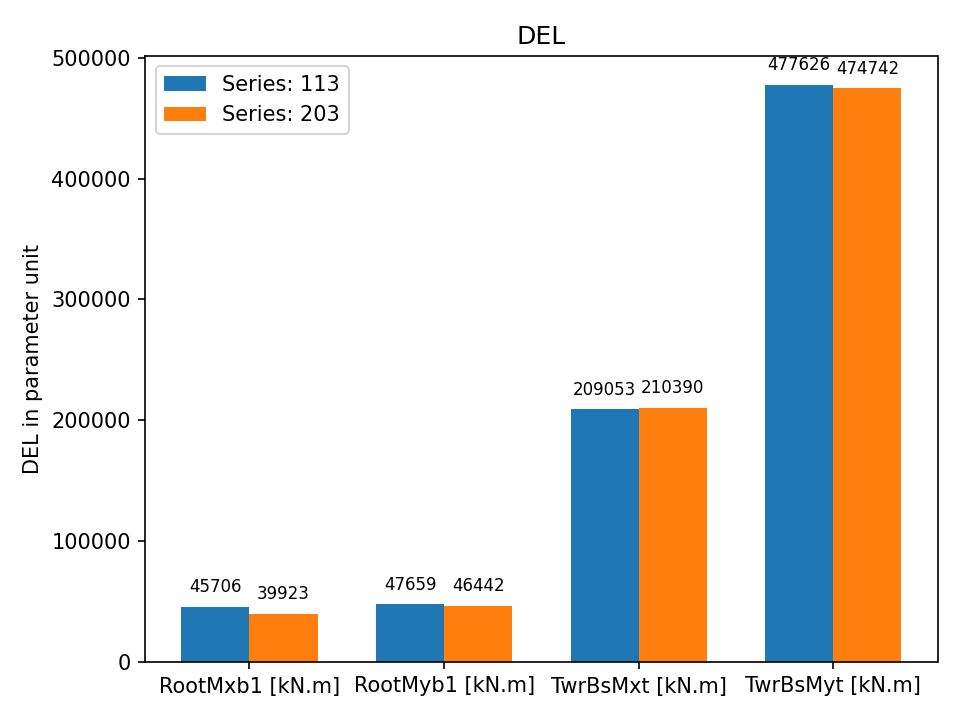

In [14]:
# Make bar plot

labels = plot_var_names

print(labels)


series1 = [round(num) for num in DEL[0]]

if len(selected_folders) > 1:
    series2 = [round(num) for num in DEL[1]]
if len(selected_folders) > 2:    
    series3 = [round(num) for num in DEL[2]]


y_label = 'DEL in parameter unit'

#st.plot.BarPlot1Series(labels,series1,folder_prefix)


if len(selected_folders) == 2:
    fig = st.plot.BarPlot2SeriesPars('DEL',y_label,labels,series1,series2,folder_prefix)
elif len(selected_folders) == 3:
    fig = st.plot.BarPlot3SeriesPars('DEL',y_label,labels,series1,series2,series3,folder_prefix)



350016.0
307030.6


<IPython.core.display.Javascript object>


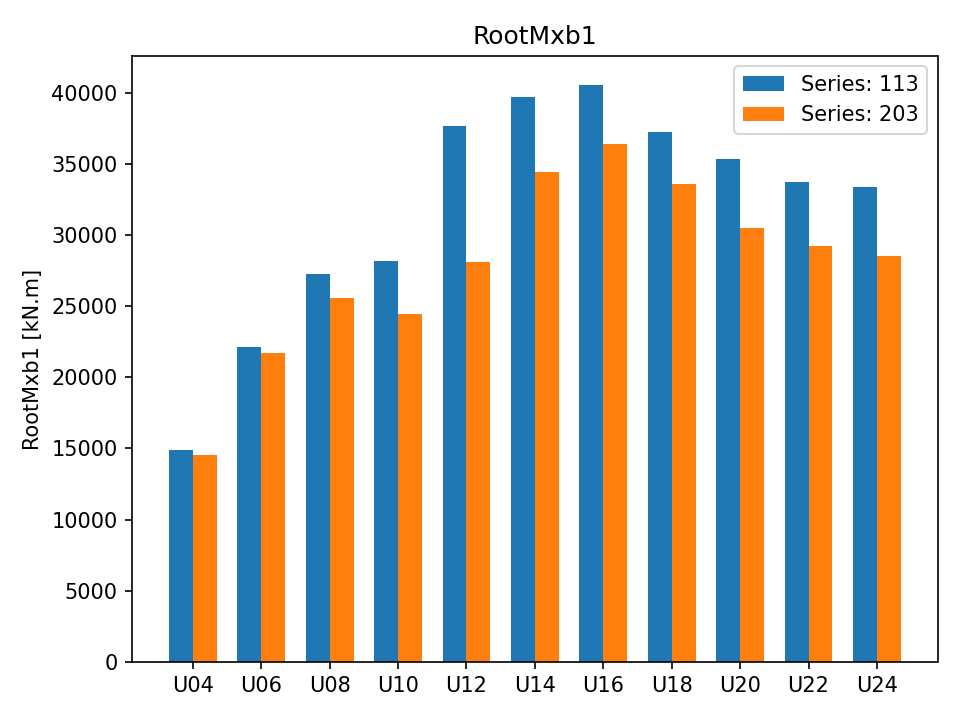

In [18]:

series1 = [round(num) for num in DEL_ws[0,:,0]]
if len(selected_folders) > 1:
    series2 = [round(num,1) for num in DEL_ws[1,:,0]]
if len(selected_folders) > 2:
    series3 = [round(num,1) for num in DEL_ws[2,:,0]]
    
print(sum(series1))
print(sum(series2))
#print(sum(series3))
    
if len(selected_folders) == 2:
    st.plot.BarPlot2SeriesWS(plot_vars[0], x_labels,series1, series2,folder_prefix, labels[0])
elif len(selected_folders) == 3:
    st.plot.BarPlot3SeriesWS(plot_vars[0],x_labels,series1,series2,series3,folder_prefix, labels[0])

405735.0
396977.10000000003


<IPython.core.display.Javascript object>


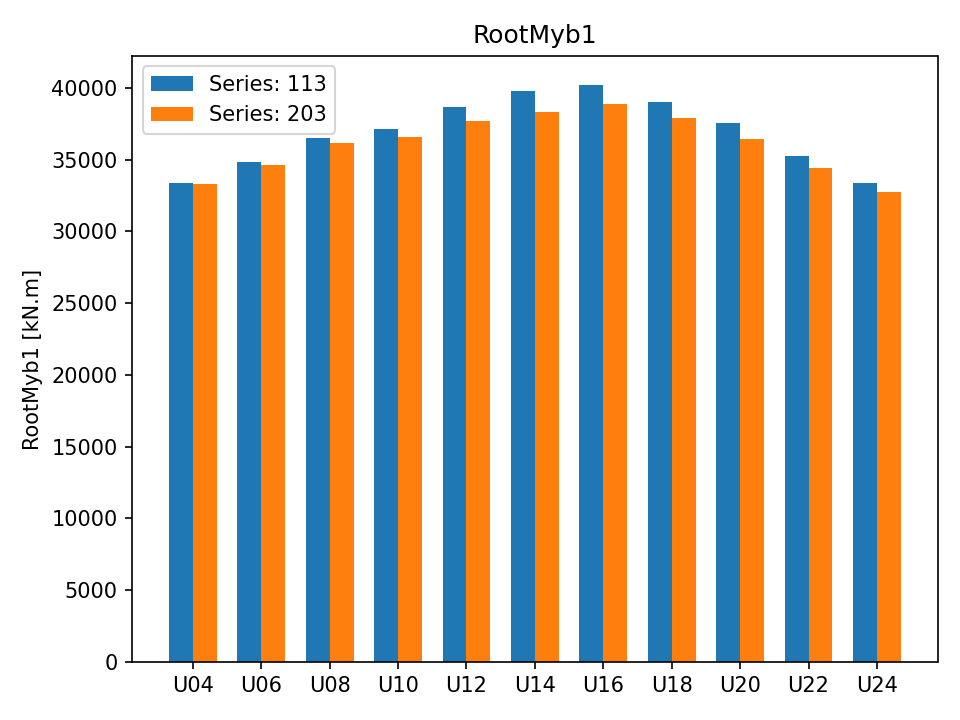

In [20]:


series1 = [round(num) for num in DEL_ws[0,:,1]]
if len(selected_folders) > 1:
    series2 = [round(num,1) for num in DEL_ws[1,:,1]]
if len(selected_folders) > 2:
    series3 = [round(num,1) for num in DEL_ws[2,:,1]]
    
print(sum(series1))
print(sum(series2))
#print(sum(series3))
    
if len(selected_folders) == 2:
    st.plot.BarPlot2SeriesWS(plot_vars[1],x_labels,series1, series2,folder_prefix, labels[1])
elif len(selected_folders) == 3:
    st.plot.BarPlot3SeriesWS(plot_vars[1],x_labels,series1,series2,series3,folder_prefix, labels[1])



879657.0
883313.9000000001


<IPython.core.display.Javascript object>


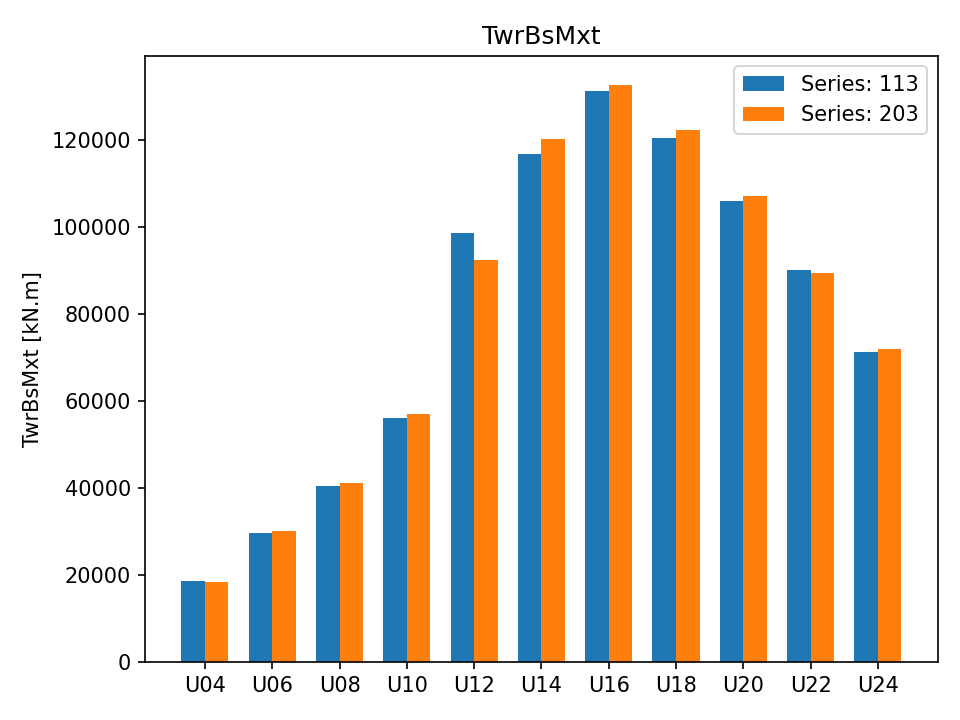

In [21]:

series1 = [round(num) for num in DEL_ws[0,:,2]]
if len(selected_folders) > 1:
    series2 = [round(num,1) for num in DEL_ws[1,:,2]]
if len(selected_folders) > 2:
    series3 = [round(num,1) for num in DEL_ws[2,:,2]]
    
print(sum(series1))
print(sum(series2))
#print(sum(series3))
    
if len(selected_folders) == 2:
    st.plot.BarPlot2SeriesWS(plot_vars[2],x_labels,series1, series2,folder_prefix, labels[2])
elif len(selected_folders) == 3:
    st.plot.BarPlot3SeriesWS(plot_vars[2],x_labels,series1,series2,series3,folder_prefix, labels[2])

2266863.0
2255347.1


<IPython.core.display.Javascript object>


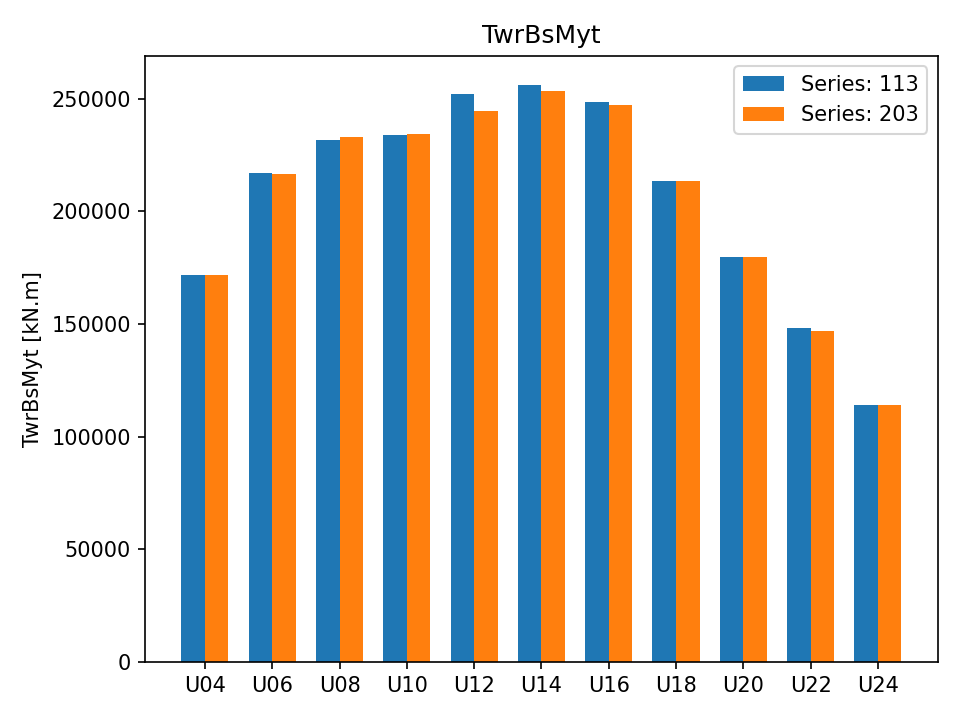

In [22]:
series1 = [round(num) for num in DEL_ws[0,:,3]]
if len(selected_folders) > 1:
    series2 = [round(num,1) for num in DEL_ws[1,:,3]]
if len(selected_folders) > 2:
    series3 = [round(num,1) for num in DEL_ws[2,:,3]]
    
print(sum(series1))
print(sum(series2))
#print(sum(series3))
    
if len(selected_folders) == 2:
    st.plot.BarPlot2SeriesWS(plot_vars[3],x_labels,series1, series2,folder_prefix, labels[3])
elif len(selected_folders) == 3:
    st.plot.BarPlot3SeriesWS(plot_vars[3],x_labels,series1,series2,series3,folder_prefix, labels[3])